In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Telanana Vechiles Data.csv"

In [3]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
#As i want to rename the colums which could be convient for me to visualize the data 

column_mapping = {
    "rowid": "row_id",
    "Model_Desc": "model_description",
    "Fuel": "fuel_type",
    "Colour": "color",
    "V_Vhc_ClsID": "vehicle_class_id",
    "Make_Yr": "manufacture_year",
    "SeatingCapacity": "seating_capacity",
    "InsuranceCompany": "insurance_company",
    "IncValidTo": "insurance_validity",
    "SecondVehicle": "second_vehicle",
    "TempRegnNo": "temporary_reg_no",
    "C_Transport": "transport_class",
    "Manufacturer_Name": "manufacturer_name",
    "Apprved_Dt": "approval_date",
    "OfficeCd": "office_code"
}
data.rename(columns=column_mapping, inplace=True)

In [5]:
# dropping the dublicate values 

cleaned = data.drop_duplicates()

In [6]:
# Convert date columns to datetime format

date_columns = ['manufacture_year', 'insurance_validity', 'approval_date']
for col in date_columns:
    cleaned[col] = pd.to_datetime(cleaned[col], errors='coerce')

C:\Users\sravani\AppData\Local\Temp\ipykernel_19628\3151637998.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned[col] = pd.to_datetime(cleaned[col], errors='coerce')
C:\Users\sravani\AppData\Local\Temp\ipykernel_19628\3151637998.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned[col] = pd.to_datetime(cleaned[col], errors='coerce')


In [7]:
#the cleaned dataset

print("Dataset shape after cleaning:", cleaned.shape)
print("Columns:", cleaned.columns.tolist())
print("Missing values:\n", cleaned.isnull().sum())

Dataset shape after cleaning: (1048575, 15)
Columns: ['row_id', 'model_description', 'fuel_type', 'color', 'vehicle_class_id', 'manufacture_year', 'seating_capacity', 'insurance_company', 'insurance_validity', 'second_vehicle', 'temporary_reg_no', 'transport_class', 'manufacturer_name', 'approval_date', 'office_code']
Missing values:
 row_id                     0
model_description          0
fuel_type              16474
color                    215
vehicle_class_id           0
manufacture_year           0
seating_capacity           0
insurance_company       3765
insurance_validity      3728
second_vehicle             0
temporary_reg_no           0
transport_class            0
manufacturer_name          0
approval_date              0
office_code           124715
dtype: int64


In [8]:
# Saving the cleaned dataset

output_file = r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv"
cleaned.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to {output_file}")

Cleaned dataset saved to C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv


## DATA VISULAZATION 

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [10]:
# Load data
data = pd.read_csv(r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv")

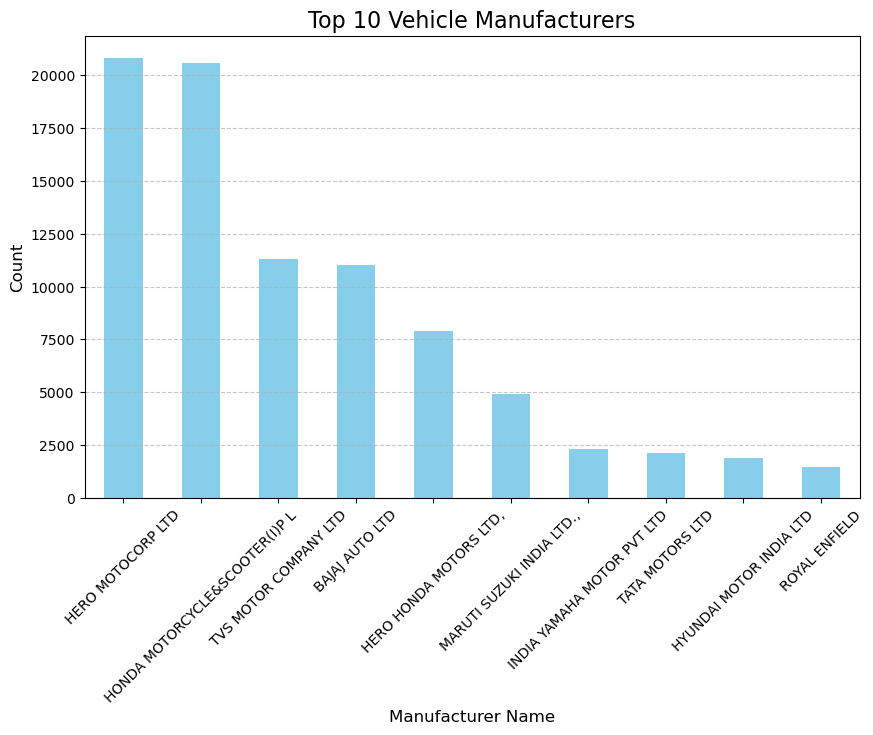

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a subset of the data to avoid kernel crashes
data = pd.read_csv(r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv", nrows=100000)

# Plot
manufacturer_counts = data['manufacturer_name'].value_counts().head(10)  # Top 10 manufacturers
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Vehicle Manufacturers", fontsize=16)
plt.xlabel("Manufacturer Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

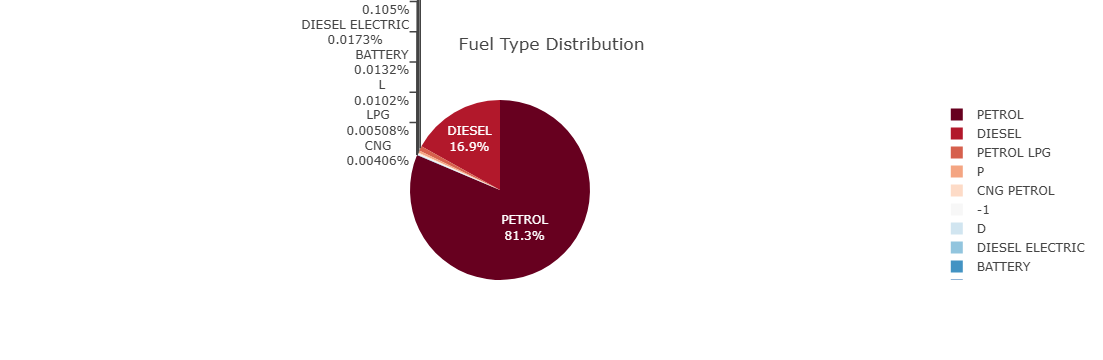

In [23]:
fuel_type_counts = data['fuel_type'].value_counts().reset_index()
fuel_type_counts.columns = ['Fuel Type', 'Count']

fig = px.pie(fuel_type_counts, names='Fuel Type', values='Count',
             title="Fuel Type Distribution",
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+label')
fig.show()

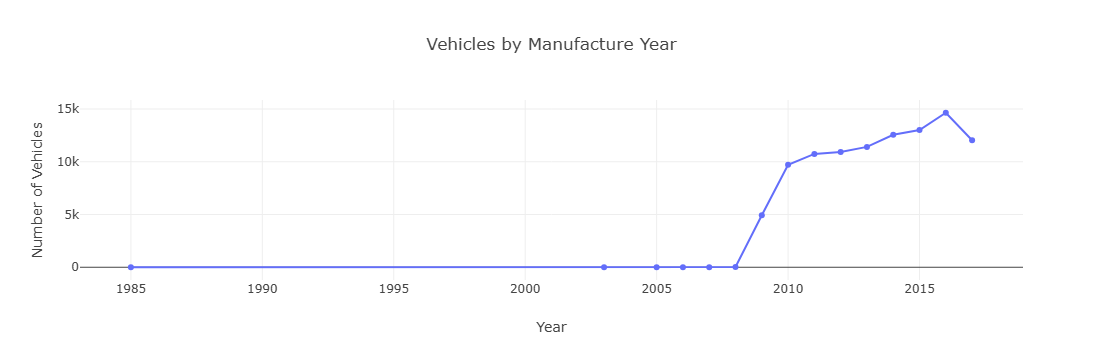

In [24]:
year_counts = data['manufacture_year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Manufacture Year', 'Count']

fig = px.line(year_counts, x='Manufacture Year', y='Count', 
              title="Vehicles by Manufacture Year",
              markers=True, color_discrete_sequence=['#636EFA'])
fig.update_layout(xaxis_title="Year", yaxis_title="Number of Vehicles")
fig.show()


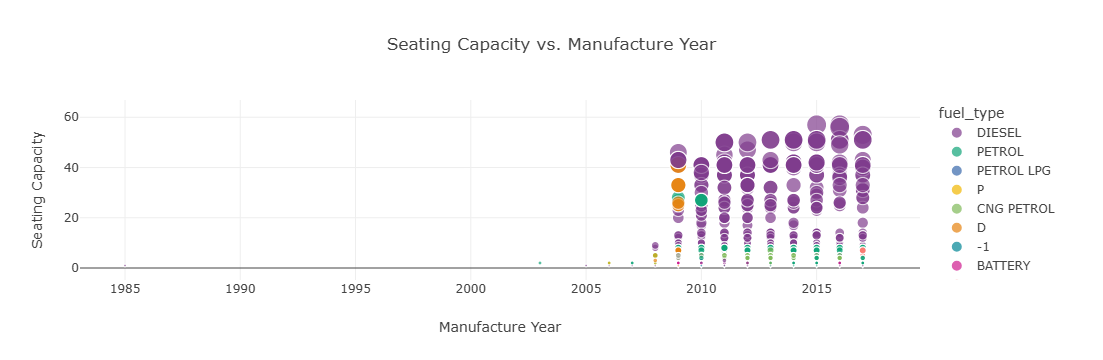

In [25]:
fig = px.scatter(data, x='manufacture_year', y='seating_capacity', 
                 color='fuel_type', size='seating_capacity', 
                 title="Seating Capacity vs. Manufacture Year",
                 labels={'manufacture_year': 'Manufacture Year', 'seating_capacity': 'Seating Capacity'},
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()


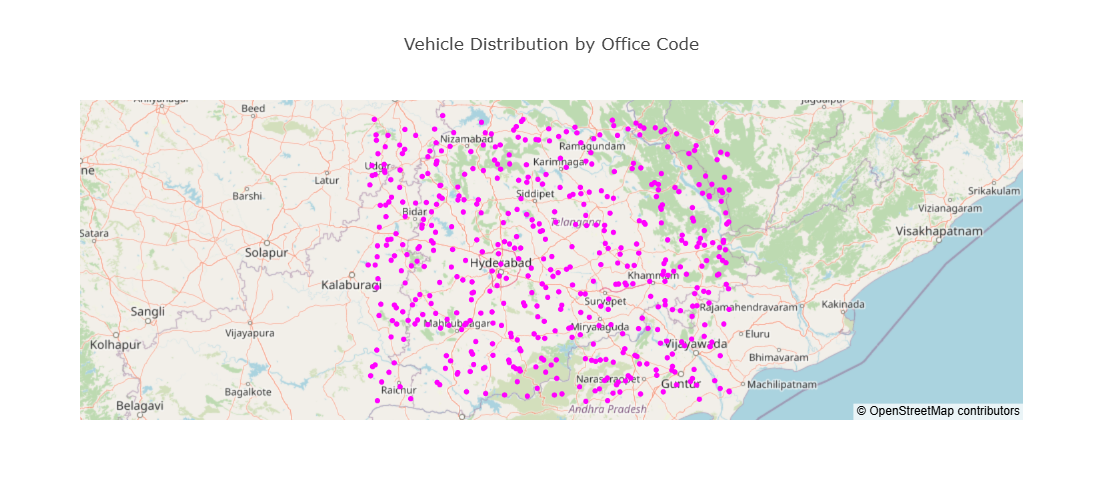

In [28]:
# Example: Simulating a location-based plot (replace with actual lat/lon data if available)
import random

data_sample = data.sample(n=500)  # Sampling for performance
data_sample['latitude'] = [random.uniform(16, 19) for _ in range(len(data_sample))]
data_sample['longitude'] = [random.uniform(77, 81) for _ in range(len(data_sample))]

fig = px.scatter_mapbox(data_sample, lat='latitude', lon='longitude', hover_name='office_code',
                        color_discrete_sequence=["fuchsia"], zoom=6, height=500,
                        title="Vehicle Distribution by Office Code")
fig.update_layout(mapbox_style="open-street-map")
fig.show()


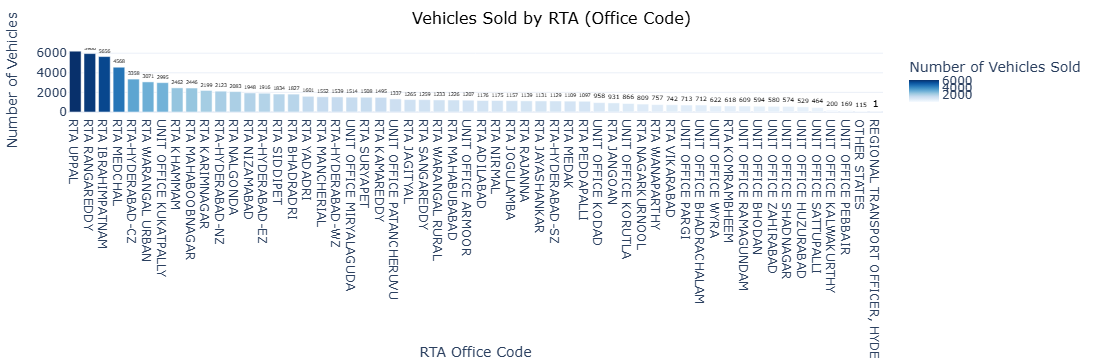

In [38]:
import plotly.express as px
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv", nrows=100000)

# Count the number of vehicles sold by office_code (RTA)
rta_vehicle_counts = data['office_code'].value_counts().reset_index()
rta_vehicle_counts.columns = ['RTA Office Code', 'Vehicle Count']

# Create a clean and minimalist bar chart
fig = px.bar(rta_vehicle_counts, 
             x='RTA Office Code', 
             y='Vehicle Count', 
             title="Vehicles Sold by RTA (Office Code)",
             labels={'Vehicle Count': 'Number of Vehicles Sold'},
             color='Vehicle Count',  # Color based on the count for a smooth look
             color_continuous_scale='Blues',  # A refined blue gradient
             text='Vehicle Count',  # Display count on top of bars
             category_orders={'RTA Office Code': rta_vehicle_counts['RTA Office Code'].tolist()},  # Sort RTA codes
             hover_data={'RTA Office Code': True, 'Vehicle Count': True}  # Simplified hover info
            )

# Update layout for a clean and neat look
fig.update_layout(
    xaxis_title="RTA Office Code", 
    yaxis_title="Number of Vehicles",
    template="plotly_white",  # White background for a clean design
    showlegend=False,  # Hide legend as it's not necessary
    plot_bgcolor="rgba(255, 255, 255, 0)",  # Transparent background to keep it clean
    title_x=0.5,  # Center the title
    title_font=dict(size=16, color="black"),  # Slightly smaller title font
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for optimal spacing
    autosize=True  # Make the chart responsive
)

# Update text and hovertemplate for clean, minimal design
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Vehicles Sold: %{y}<extra></extra>",  # Simple hover info
    textposition='outside',  # Position the count text outside the bars
    textfont=dict(size=10, color='black'),  # Smaller text for count labels
    texttemplate='%{text}',  # Use only the count as the text
)

# Show the interactive plot
fig.show()

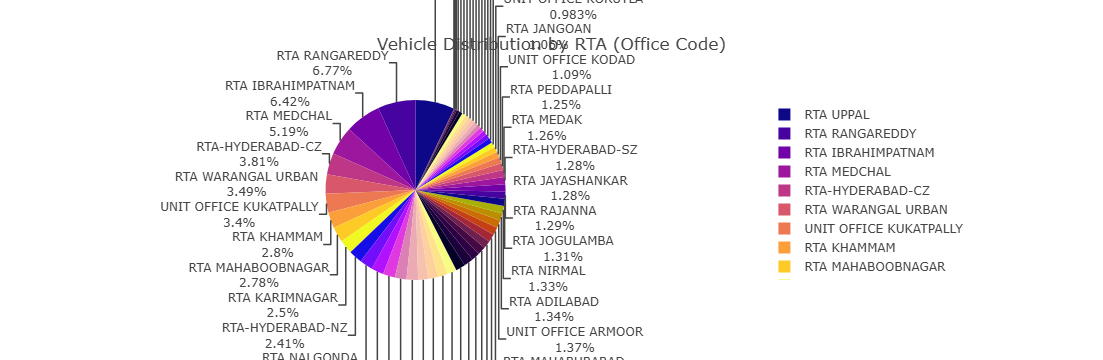

In [41]:
fig = px.pie(rta_vehicle_counts, 
             names='RTA Office Code', 
             values='Vehicle Count', 
             title="Vehicle Distribution by RTA (Office Code)",
             color_discrete_sequence=px.colors.sequential.Plasma)

# Update traces to display percentages and labels
fig.update_traces(
    textinfo='percent+label',  
    textfont=dict(size=12),
)

fig.show()

In [52]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

# Load data
data = pd.read_csv(r"C:\Users\sravani\OneDrive\Documents\Vivek Vardhan\Cleaned_Telanana_Vehicles_Data.csv")

# Clean data for missing values
data = data.dropna(subset=['fuel_type', 'manufacturer_name', 'manufacture_year', 'seating_capacity'])

# Create a Dash app
app = dash.Dash(__name__)

# Dropdown options for Fuel Type and Manufacturer
fuel_type_options = [{'label': fuel_type, 'value': fuel_type} for fuel_type in data['fuel_type'].unique()]
manufacturer_options = [{'label': manufacturer, 'value': manufacturer} for manufacturer in data['manufacturer_name'].unique()]

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Vehicle Sales Dashboard", style={'textAlign': 'center', 'color': '#1f77b4'}),

    # Dropdown for filtering by fuel type and manufacturer
    html.Div([
        html.Label("Select Fuel Type:", style={'padding': '10px'}),
        dcc.Dropdown(
            id="fuel_type_dropdown",
            options=fuel_type_options,
            value=fuel_type_options[0]['value'],
            style={'width': '48%', 'display': 'inline-block', 'padding': '10px', 'color': 'black'}
        ),
        html.Label("Select Vehicle Manufacturer:", style={'padding': '10px'}),
        dcc.Dropdown(
            id="manufacturer_dropdown",
            options=manufacturer_options,
            value=manufacturer_options[0]['value'],
            style={'width': '48%', 'display': 'inline-block', 'padding': '10px', 'color': 'black'}
        ),
    ], style={'padding': '20px', 'display': 'flex', 'justifyContent': 'space-between'}),

    # Summary of vehicles sold by the selected manufacturer
    html.Div(id='summary_div', style={'padding': '10px', 'textAlign': 'center', 'fontSize': '18px', 'color': '#555'}),

    # Tabs for various visualizations
    dcc.Tabs(id="tabs", value='distribution', children=[
        dcc.Tab(label='Distribution', value='distribution'),
        dcc.Tab(label='Categorical', value='categorical'),
        dcc.Tab(label='Relationships', value='relationships'),
        dcc.Tab(label='Time-Series', value='timeseries'),
        dcc.Tab(label='Correlation', value='correlation'),
    ], style={'fontSize': 16, 'padding': '10px', 'backgroundColor': '#f4f4f4', 'color': '#1f77b4'}),

    # Container for visualization output
    html.Div(id='tabs-content', style={'padding': '20px'}),
])

# Callback to update the visualizations and summary based on user selection
@app.callback(
    [dash.dependencies.Output('tabs-content', 'children'),
     dash.dependencies.Output('summary_div', 'children')],
    [
        dash.dependencies.Input('tabs', 'value'),
        dash.dependencies.Input('fuel_type_dropdown', 'value'),
        dash.dependencies.Input('manufacturer_dropdown', 'value')
    ]
)
def update_content(tab, fuel_type, manufacturer):
    # Filter data based on user selection
    filtered_data = data[(data['fuel_type'] == fuel_type) & (data['manufacturer_name'] == manufacturer)]

    # Summary of vehicles sold by the selected manufacturer
    vehicles_sold_by_rta = filtered_data['office_code'].value_counts().reset_index()
    vehicles_sold_by_rta.columns = ['RTA Office Code', 'Vehicle Count']
    summary_text = f"Vehicles Sold by {manufacturer}:"
    rta_summary = html.Div([
        html.H4(summary_text),
        html.Table([
            html.Tr([html.Th("RTA Office Code"), html.Th("Vehicle Count")])] +
            [html.Tr([html.Td(row['RTA Office Code']), html.Td(row['Vehicle Count'])]) for _, row in vehicles_sold_by_rta.iterrows()]
        )
    ])

    # Visualization based on selected tab
    if tab == 'distribution':
        # Histogram for Vehicle Distribution by Manufacture Year
        fig = px.histogram(filtered_data, x="manufacture_year", nbins=30, title="Vehicle Distribution by Year",
                           color="fuel_type", color_discrete_map={"Petrol": "#ff7f0e", "Diesel": "#2ca02c"})
        fig.update_layout(bargap=0.2, title_x=0.5)
        return dcc.Graph(figure=fig), rta_summary

    elif tab == 'categorical':
        # Pie chart for Vehicle Count by Fuel Type
        fuel_count = filtered_data['fuel_type'].value_counts().reset_index()
        fuel_count.columns = ['Fuel Type', 'Count']
        fig = px.pie(fuel_count, names='Fuel Type', values='Count', title="Vehicle Distribution by Fuel Type",
                     color_discrete_map={"Petrol": "#ff7f0e", "Diesel": "#2ca02c"})
        fig.update_traces(textinfo='percent+label')
        return dcc.Graph(figure=fig), rta_summary

    elif tab == 'relationships':
        # Scatter plot for Seating Capacity vs Manufacture Year
        fig = px.scatter(filtered_data, x='manufacture_year', y='seating_capacity', color='fuel_type',
                         title="Seating Capacity vs Manufacture Year",
                         color_discrete_map={"Petrol": "#ff7f0e", "Diesel": "#2ca02c"})
        fig.update_layout(title_x=0.5)
        return dcc.Graph(figure=fig), rta_summary

    elif tab == 'timeseries':
        # Line chart for Vehicle Sales over Time (by Year)
        filtered_data['approval_date'] = pd.to_datetime(filtered_data['approval_date'])
        filtered_data['year'] = filtered_data['approval_date'].dt.year
        vehicle_sales_by_year = filtered_data.groupby('year').size().reset_index(name='Vehicle Count')

        fig = px.line(vehicle_sales_by_year, x='year', y='Vehicle Count', title="Vehicle Sales by Year",
                      line_shape='linear', markers=True, color_discrete_sequence=["#1f77b4"])
        fig.update_layout(title_x=0.5)
        return dcc.Graph(figure=fig), rta_summary

    elif tab == 'correlation':
        # Correlation heatmap for numeric features
        correlation_matrix = filtered_data[['seating_capacity', 'manufacture_year', 'vehicle_class_id']].corr()
        fig = px.imshow(correlation_matrix, title="Correlation Heatmap of Numeric Features", color_continuous_scale="Viridis")
        fig.update_layout(title_x=0.5)
        return dcc.Graph(figure=fig), rta_summary

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
